# 1.6 情報理論

## 情報量

シャノンは考えた。

- 起こりそうもない事を知る事は多くの情報を得たとする。確実に起る事を知る事は、情報を得たとしない。
- 情報量はその事象の生起確率に依存する。
- 情報量は正値である。
- 情報量には加法性があるとする。独立した事象xとyが同時に起る場合 $h(x, y) = h(x) + h(y)$

つまり事象$x$が起る確率$p(x)$を用いて、情報量$h(x)$は

### $h(x) = -log_2p(x)$ 

と表現できる。式1.92

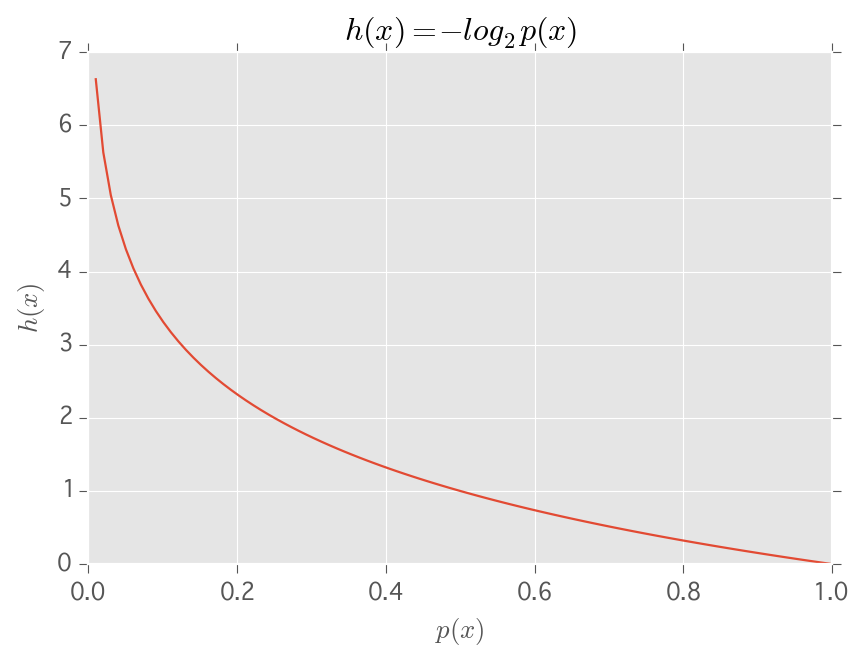

In [1]:
X = np.linspace(0, 1, 100)
Y = -1 * np.log2(X)
plt.plot(X, Y)
plt.xlabel('$p(x)$')
plt.ylabel('$h(x)$')
plt.title('$h(x) = -log_2p(x)$')

## 情報の平均量、エントロピー

### $H[x] = -\sum_{x} p(x)log_2p(x)$

式1.93

## 例： 2値が観測される場合のエントロピー

In [2]:
def calc_entropy(P):
    return sum(map(lambda p: 0 if p== 0 else p * np.log2(1/p), P))

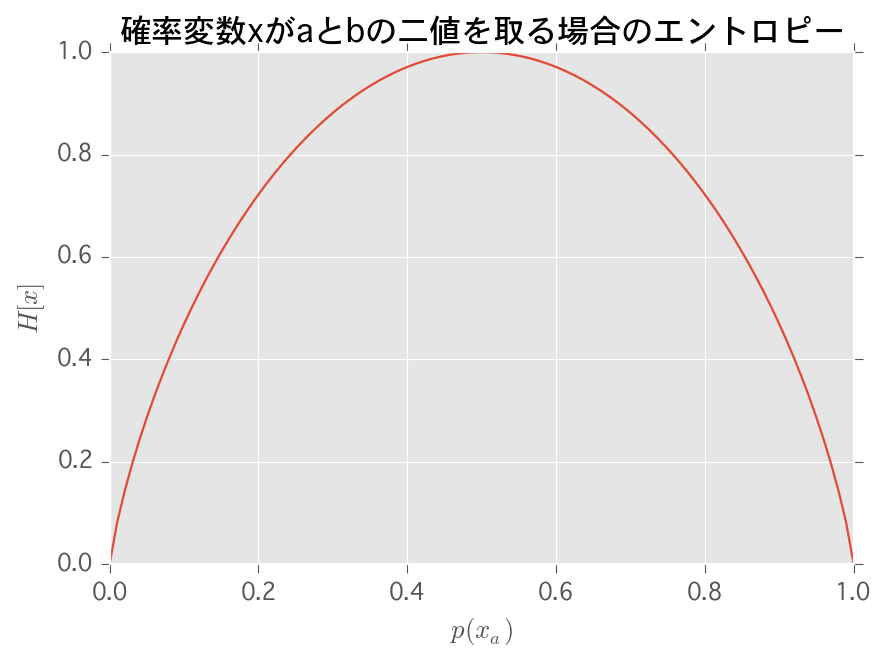

In [10]:
X = np.linspace(0, 1, 100)
p = map(lambda x: [x, 1.0 -x], X)
plt.plot(X, map(calc_entropy, p))
plt.xlabel('$p(x_a)$')
plt.ylabel('$H[x]$')
plt.title(u'確率変数xがaとbの二値を取る場合のエントロピー')

非一様な分布のエントロピーは一様な場合より小さいことがわかる。

## 符号化

さらっと二元符号化(二つの文字 {0, 1} を使う符号化)と可変長符号の話が書いてある。

「$\{a, b, c, d, e, f, g, h\}$ の状態に次の符号列を、0, 10, 110, 1110, 111100, 111101, 111110, 111111 を割りあてると平均符号長エントロピーと同じになる。」  
とさらっと書いてあるが、**これは理想的な符号長を割りあてている。**

ノイズ無し符号化定理(情報源と符号語が一対一に対応する符号化。ノイズ有りはJPG等の不可逆な奴。

## 一様分布の時にエントロピーが最大になる事の証明

ラグランジュ乗数を使う。 $p(x)$の制約は $\sum_ip(x_i) = 1$ より $H(x)$が極値を取るp(x)を求める

$H^\sim=-\sum_{i}p(x_i)lnp(x_i) + \lambda (\sum_ip(x_i) - 1)$

を変分法で解くとすべての $p(x_i)$ が等しい時に $H(x)$ が最大化される事がわかる。  
停留点が実際に最大である事は、エントロピーの二段階微分を計算すると、負定値である事から確認できる。

## エントロピーの連続変数への拡張

### $-\int p(x)lnp(x)dx$

離散値の時と同様に、エントロピーを最大とするp(x)を求めてる。

# 1.6.1 相対エントロピーと相互情報量

未知の分布$p(x)$について、モデル$q(x)$を使って符号化するとする。この時のエントロピーは

$-\int p(x)lnq(x)dx$ (他の本にはcross entropyと紹介されていた)

となり、真の分布を使って符号化した場合のエントロピーとの差は

$KL(p||q) = -\int p(x)ln\{\frac{q(x)}{p(x)}\}dx$

となり、相対エントロピーあるいはカルバックーライブラーダイバージェンス(KL ダイバージェンス)と呼ぶ

- $KL(p||q) >= 0$

すべてのp(x)とq(x)が等しいときゼロになる。よってKLダイバージェンスはp(x)とq(x)の隔りを表す尺度と解釈できる。

## 相互情報量

変数が独立に近いかどうかを、同時分布と周辺分布の積の間のKLダイバージェンスで考える。  
これはxとyの相互情報量と呼ばれる

$I[x, y] >= 0$

In [22]:
p = [0.5, 0.5]
Q = [[q, 1-q] for q in np.linspace(0, 1, 100)]

In [61]:
def calc_cross_entropy(P, Q):
    ret = []
    for p, q in zip(P, Q):
        if p == 0 or q == 0:
            ret.append(0)
        else:
            ret.append(p*np.log2(1/q))
    return sum(ret)

def calc_kld(p, q):
    return -1 * (calc_entropy(p) - calc_cross_entropy(p, q))
    

In [62]:
ret = []
for p, q in zip([p]*100, Q):
    ret.append(calc_kld(p, q))

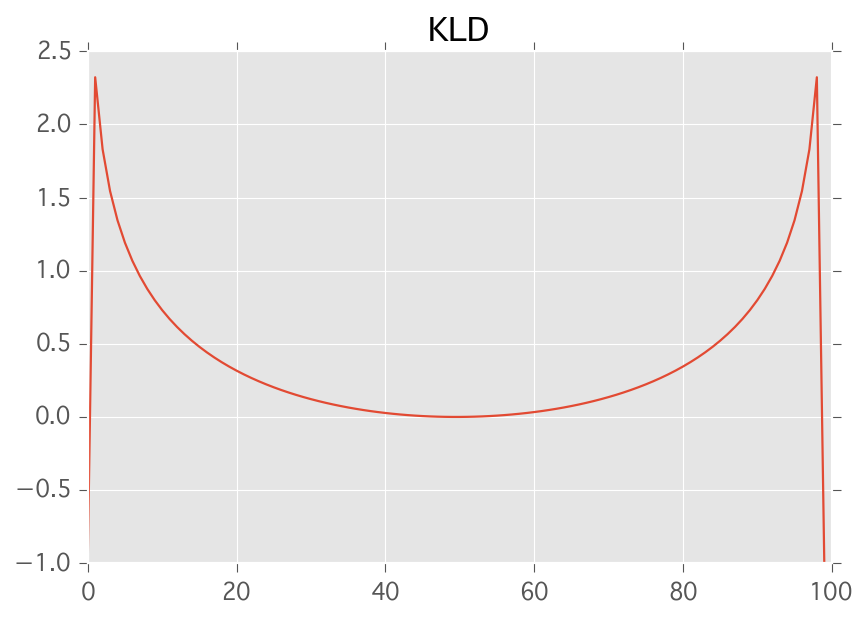

In [64]:
plt.title('KLD')
plt.plot(ret)